### Crater Rim Erasure

This notebook visualizes crater rim erasure as a result of new crater formation. A simulation is run and craters are plotted with erased crater segments shown in blue.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools

from typing import Dict

from saturation.simulation import *
from saturation.distributions import *
from saturation.geometry import *
from saturation.plotting import *
from saturation.crater_record import *

These first three plots show an effective radius multiplier of 1 after 100, 200, and 300 craters.

In [ ]:
x_min = 12
x_max = 250
r_stat = 1 * x_min
min_rim_percentage = 0.5
cdf_slope = 1.5
observed_terrain_size = 1000
terrain_padding = 125
full_terrain_size = observed_terrain_size + 2 * terrain_padding
n_craters = 150
effective_radius_multiplier = 1

np.random.seed(123)
distribution = ParetoProbabilityDistribution(cdf_slope=cdf_slope, x_min=x_min, x_max=x_max)
craters = list(itertools.islice(get_craters(distribution, full_terrain_size), n_craters))

In [ ]:
crater_record = CraterRecord(r_stat, min_rim_percentage, effective_radius_multiplier, observed_terrain_size, terrain_padding)

for crater in craters[:50]:
    crater_record.add(crater)
plot_crater_record(crater_record, observed_terrain_size, terrain_padding, figsize=6)

for crater in craters[50:100]:
    crater_record.add(crater)
plot_crater_record(crater_record, observed_terrain_size, terrain_padding, figsize=6)

for crater in craters[100:]:
    crater_record.add(crater)
plot_crater_record(crater_record, observed_terrain_size, terrain_padding, figsize=6)

These plots show an effective radius multiplier of 1.5

In [ ]:
crater_record = CraterRecord(r_stat, min_rim_percentage, 1.5, observed_terrain_size, terrain_padding)

for crater in craters[:50]:
    crater_record.add(crater)
plot_crater_record(crater_record, observed_terrain_size, terrain_padding, figsize=6)

for crater in craters[50:100]:
    crater_record.add(crater)
plot_crater_record(crater_record, observed_terrain_size, terrain_padding, figsize=6)

for crater in craters[100:]:
    crater_record.add(crater)
plot_crater_record(crater_record, observed_terrain_size, terrain_padding, figsize=6)

### Examining Arcs

In [36]:
r_stat = 1
min_rim_percentage = 0.5
observed_terrain_size = 1000
terrain_padding = 0
full_terrain_size = observed_terrain_size + 2 * terrain_padding
effective_radius_multiplier = 1

craters = [
    Crater(id=1, x=500, y=500, radius=300),
    Crater(id=2, x=850, y=550, radius=150),
    Crater(id=3, x=250, y=450, radius=150),
    Crater(id=4, x=280, y=450, radius=100),
    Crater(id=5, x=500, y=800, radius=100),
    Crater(id=6, x=500, y=300, radius=250),
]
crater_record = CraterRecord(r_stat, min_rim_percentage, effective_radius_multiplier, observed_terrain_size, terrain_padding)

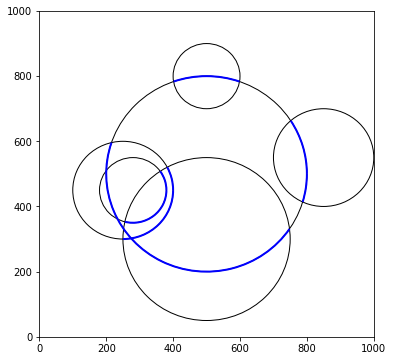

In [37]:
for crater in craters:
    crater_record.add(crater)
plot_crater_record(crater_record, observed_terrain_size, terrain_padding, figsize=6)

In [38]:
# Arc remaining
1 - sum(x[1] - x[0] for x in crater_record._erased_arcs[1]) / (2 * np.pi)

0.2985883891910859

0.30754716981132074

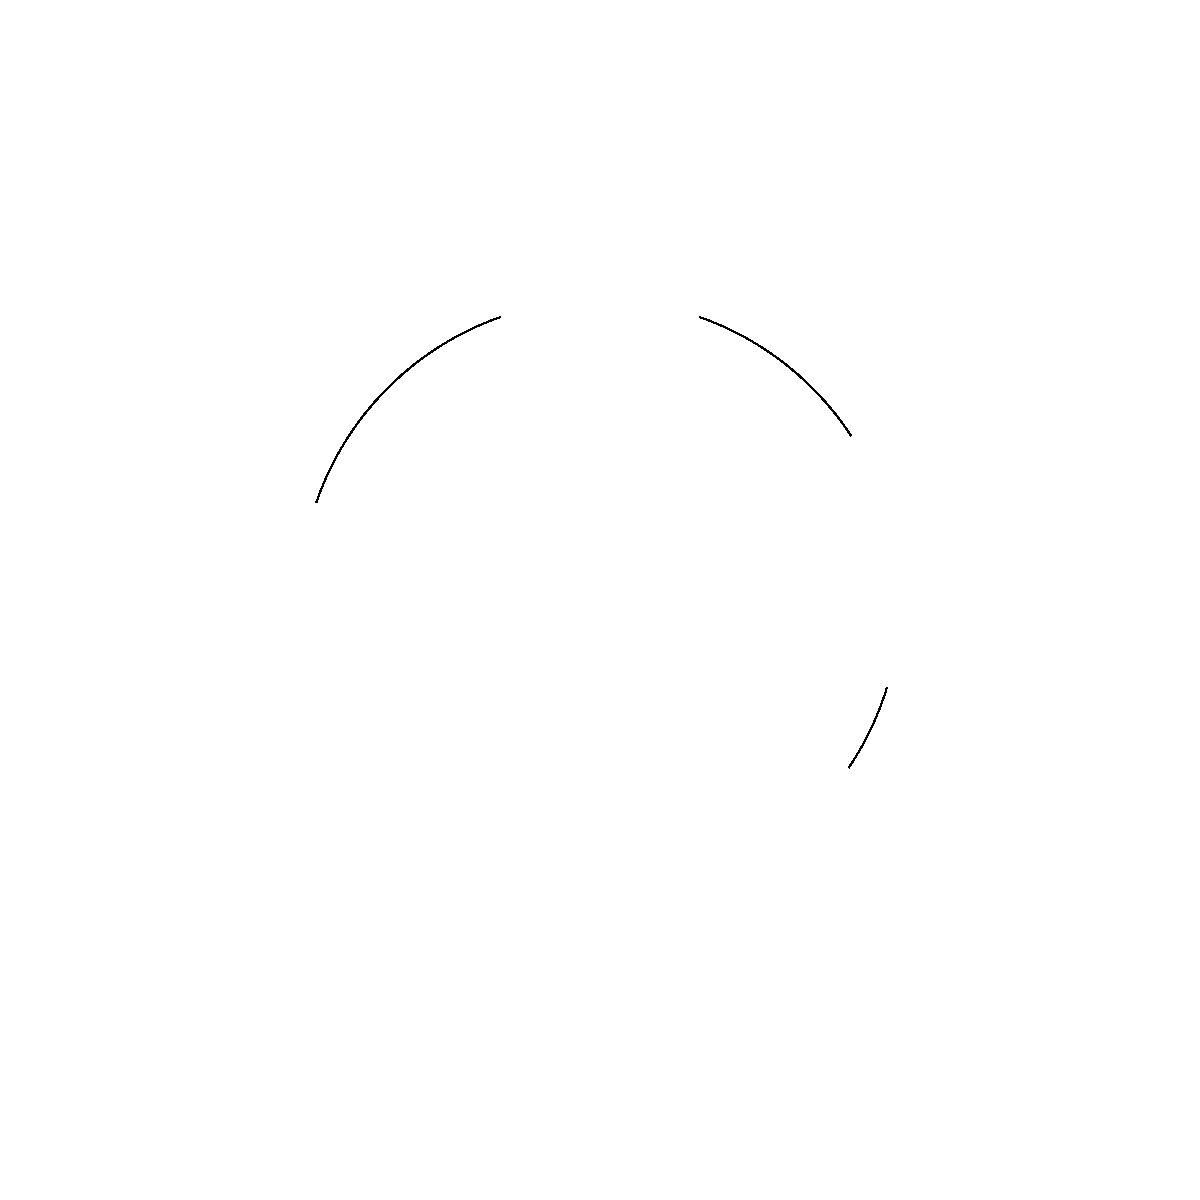

In [39]:
# Compare with plot exported to an image
fig, ax = plt.subplots(figsize=(1, 1), dpi=observed_terrain_size)
fig.tight_layout()
plt.tight_layout()

ax.set_frame_on(False)
ax.axis('off')
ax.set_xlim([terrain_padding, observed_terrain_size + terrain_padding])
ax.set_ylim([terrain_padding, observed_terrain_size + terrain_padding])

plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=1, 
                    top=1, 
                    wspace=0.0, 
                    hspace=0.0)

# Plot craters
first = craters[0]
plot_circle((first.x, first.y), first.radius, ax, fill=False, color='black', antialiased=False, lw=1/observed_terrain_size*72)
   
img = convert_plot_to_array(fig, show_plot=True)
before = img.sum()

# After
for crater in craters[1:]:
    plot_circle((crater.x, crater.y), crater.radius, ax, fill=True, color='white', antialiased=False, lw=0)
    
img = convert_plot_to_array(fig, show_plot=True)
after = img.sum()

after/before